# Mini Project D7041E , Group 31

## Jacob Möller,  jacmll-9@student.ltu.se
## Emil Wiklund, emiwik-9@student.ltu.se

### Introduction

This mini project were done to futher improve our skills in and understanding of using MLP (multi-layer-percepton neural network) for supervised learning. The project utalizes the familiar dataset MNIST.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


## Load dataset

In [25]:
#loadning image data from MNIST of handwritten digits.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#loads 60k training images and 10k testing images (pre setting of this data load method)
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False)

## Data Sample

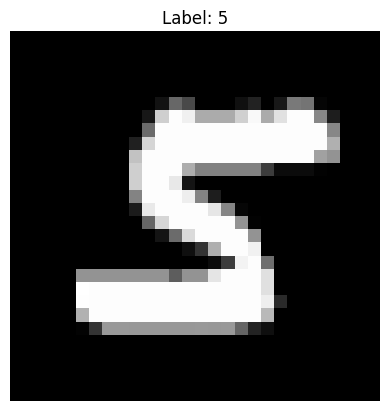

One random data sample from the MNIST data set.


In [26]:
sample_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
images, labels = next(iter(sample_loader))

image = images.squeeze().cpu().numpy()
label= labels.item()

plt.imshow(image, cmap='gray', extent=[0,14,14,0])
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

print("One random data sample from the MNIST data set.")

#kansek kan snacka om hur modellen ser ett sample

## Training phase

In [27]:
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


## Testing phase

In [28]:
def test_model(model):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

## The model

In [29]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        

    def forward(self, x):
        x = x.view(x.size(0), -1) #flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)    
        x = F.softmax(x, dim = 1)
        return x
    
#trying to get the confusion to work
def test_model_2(model):
    model.eval()
    all_predictions = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
            all_images.extend(images)

    accuracy = accuracy_score(all_labels, all_predictions)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    return accuracy

## Main

In [30]:
torch.manual_seed(42)

# Define parameters
input_size = 28 * 28 # Is determined by the size of an image in MNIST
hidden_size = 128
output_size = 10
learning_rate = 0.1
num_epochs = 5
iterations = 10

# start the model
model = MLPModel(input_size, hidden_size, output_size)
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train model
#train_model(model, criterion, optimizer, num_epochs)

# Test model
#accuracy = test_model(model)

# Test model with confusion
#accuracy = test_model_2(model)
#print(f"Accuracy on the test set: {accuracy}")

In the confusion-matrix above the amount of correct prediction for a certain class is illustrated through the posistional indecies.

In the first row (row = 0) the calss corresponds to the handwritten digit of the number 0, the first coloum we can see that 974 samples were correctly predicted compared with its lable.

At index (i = 0 , j = 3) we can see that a sample with lable 0 was classified as the number 3.

## Hyper parameter tuning

In [31]:
print("While hidden_size changes:")
for iteration in range(1, iterations):
    hidden_size = hidden_size - 8
    print(f"Iteration: {iteration} Epoch: {num_epochs} Learning rate: {learning_rate} Hidden size: {hidden_size}")

    #need to instaciate a new model for every hidden layer_size
    model = MLPModel(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(model, criterion, optimizer, num_epochs)

    accuracy = test_model_2(model)
    print(f"Accuracy on the test set: {accuracy}")

While hidden_size changes:
Iteration: 1 Epoch: 5 Learning rate: 0.001 Hidden size: 120


KeyboardInterrupt: 

In [ ]:
print("While learning_rate changes:")
for iteration in range(1, iterations):
    learning_rate = learning_rate / 10
    print(f"Iteration: {iteration} Epoch: {num_epochs} Learning rate: {learning_rate} Hidden size: {hidden_size}")

    #model = MLPModel(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(model, criterion, optimizer, num_epochs)

    accuracy = test_model_2(model)
    print(f"Accuracy on the test set: {accuracy}")

In [ ]:
print("While num_epochs changes:")
for iteration in range(1, iterations):
    num_epochs += 5
    print(f"Iteration: {iteration} Epoch: {num_epochs} Learning rate: {learning_rate} Hidden size: {hidden_size}")

    #model = MLPModel(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(model, criterion, optimizer, num_epochs)

    accuracy = test_model_2(model)
    print(f"Accuracy on the test set: {accuracy}")

## Use the best parameters